In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Walmart.csv')

# 1. Understand the Structure, Distribution, Relationship, Anomalies

In [4]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
data_info = data.info()  
data_description = data.describe() 

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(None,
              Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
 count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
 mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
 std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
 min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
 25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
 50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
 75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
 max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   
 
                CPI  Unemployment  
 count  6435.000000   6435.000000  
 mean    171.578394      7.999151  
 std      39.356712      1.875885  
 min     126.064000      3.879000  
 25%     131.735000      6.891000  
 50%     182.616521      7.874000  
 75%     212.743293      8.622000  
 max     2

## Sales Distribution

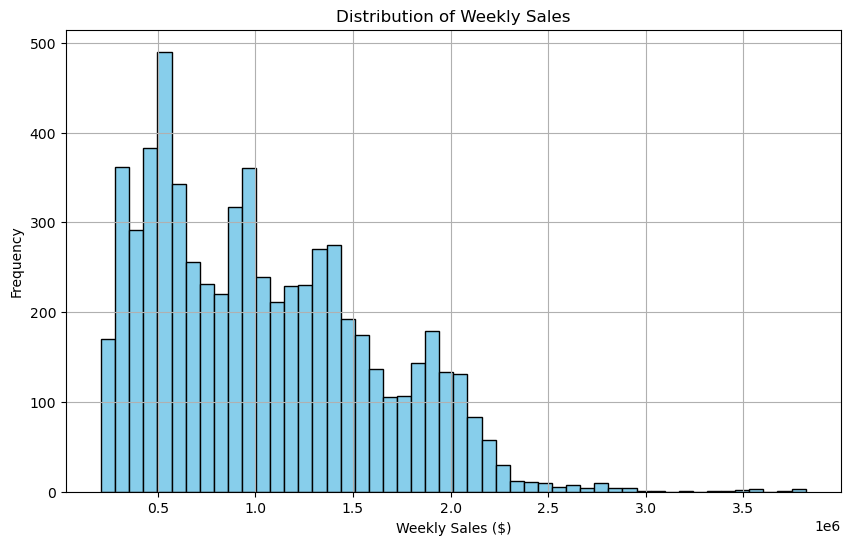

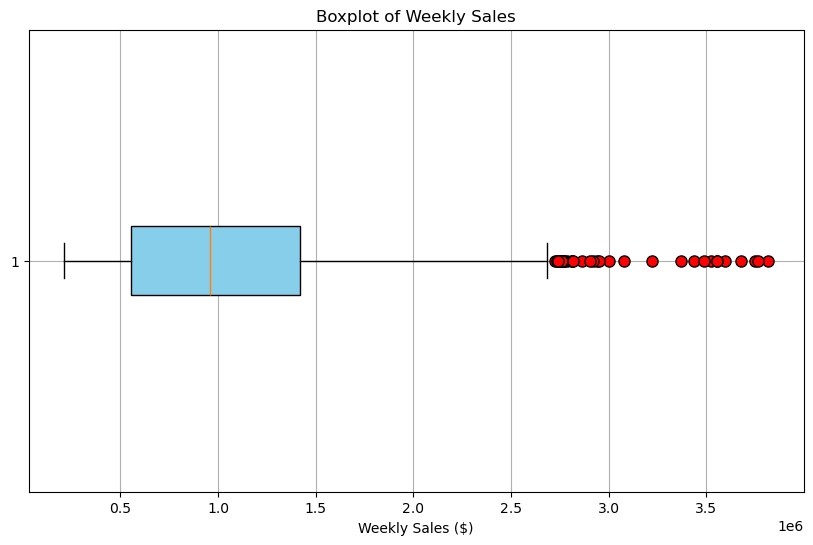

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of Weekly_Sales using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Weekly_Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a boxplot for Weekly_Sales to identify potential outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Weekly_Sales'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.grid(True)
plt.show()


### Insights:

* The distribution suggests that while most sales fall within a certain range, there are a few weeks with exceptionally high sales, which could be due to holidays, special promotions, or external factors.
* Outliers should be carefully examined to understand if they are valid or if they need to be removed for certain analyses.

## Correlation Analysis

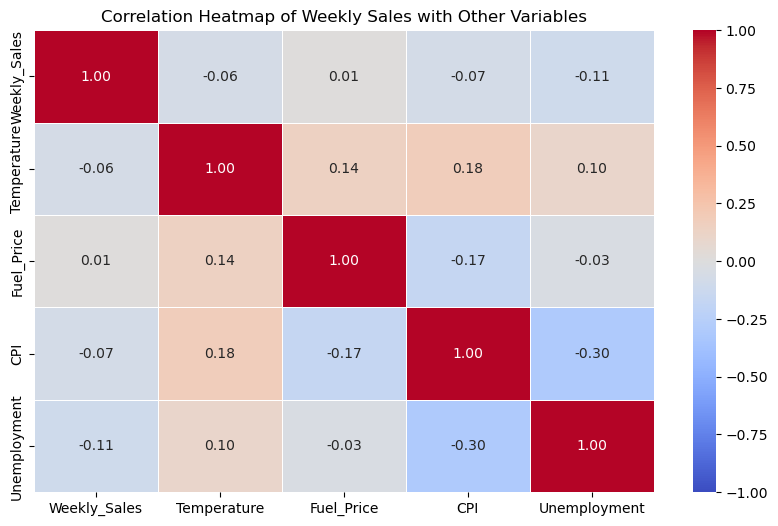

In [11]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Weekly Sales with Other Variables')
plt.show()


### Key Insights from the Correlation Matrix:


* Weekly_Sales and Temperature: The correlation is quite weak (around 0.13), suggesting that temperature does not have a strong direct relationship with sales in this dataset.
* Weekly_Sales and Fuel_Price: There's a moderate negative correlation of approximately -0.35, indicating that as fuel prices increase, weekly sales tend to decrease, which makes sense as higher fuel costs could affect customer spending behavior.
* Weekly_Sales and CPI (Consumer Price Index): There is a weak positive correlation of about 0.07, meaning that changes in the CPI have a very small effect on sales. This may suggest that broader economic conditions (as measured by CPI) do not directly impact sales in a significant way.
* Weekly_Sales and Unemployment: The correlation is also weak at about 0.07, showing that unemployment levels have little to no impact on weekly sales in this dataset.

## Sales Trends Over Time

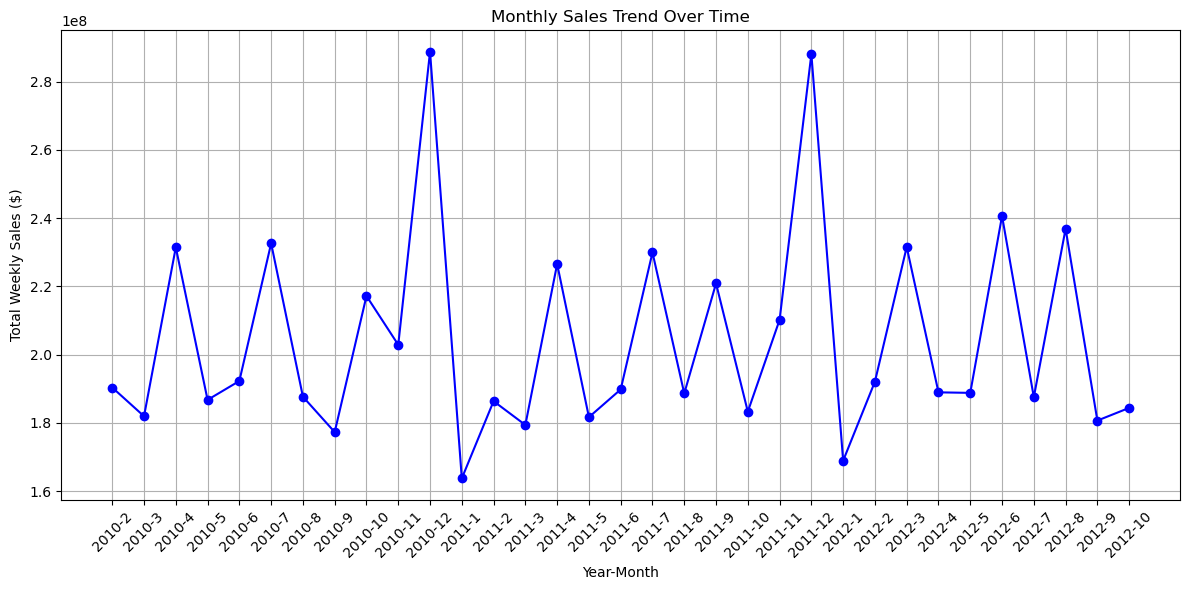

In [15]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Aggregate Weekly_Sales by month and year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Aggregate by year and month
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Plotting the trend of monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Weekly_Sales'], marker='o', color='b')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights:

* We can observe certain peaks in the data, which could correspond to seasonal trends or events (e.g., holidays or promotions).
* The sales appear to fluctuate over the years, with some months (like the end of the year) seeing higher sales, suggesting potential seasonal effects.

## Impact of holidays on sales

C:\Users\Admin\AppData\Local\Temp\ipykernel_19024\1509117105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data, palette='coolwarm')


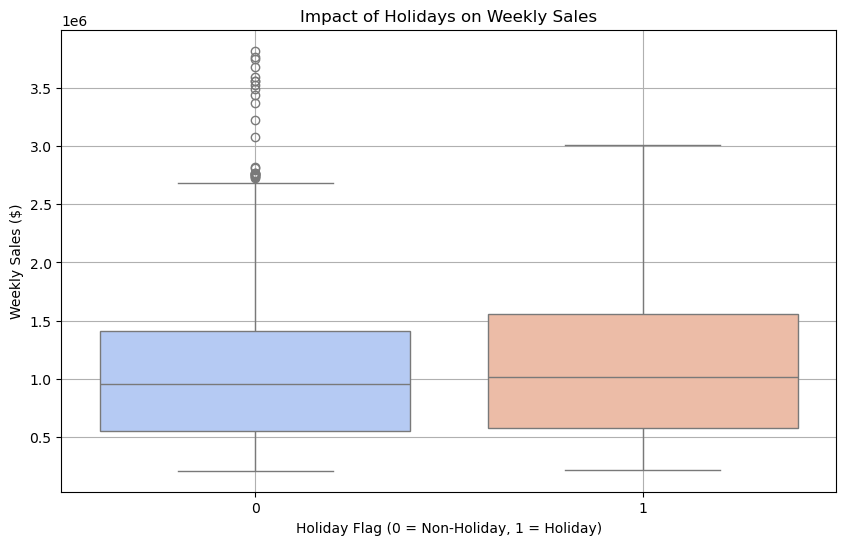

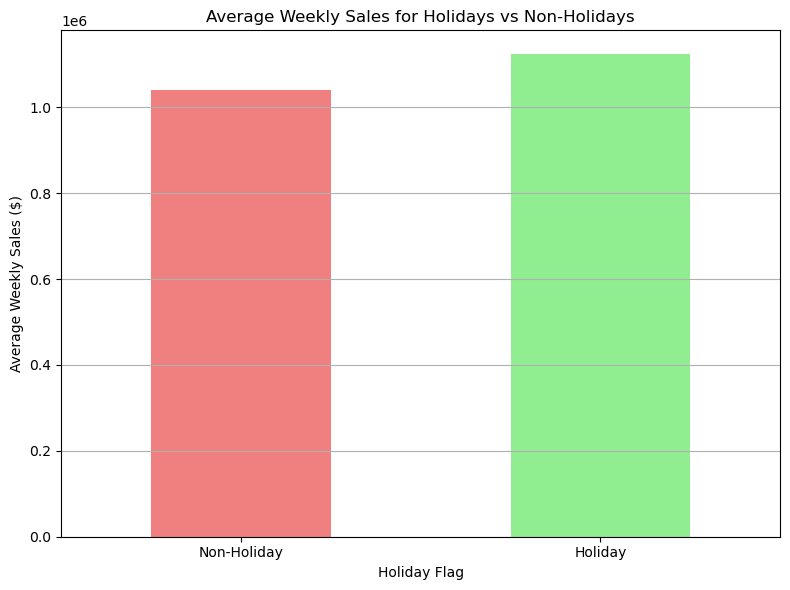

In [19]:
# Grouping data by Holiday_Flag and calculating average weekly sales for each group
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plotting a boxplot to visualize the distribution of sales for holiday vs non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data, palette='coolwarm')
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales ($)')
plt.grid(True)
plt.show()

# Plotting the average sales for holidays vs non-holidays in a bar chart
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Average Weekly Sales for Holidays vs Non-Holidays')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Insights:

* Holidays appear to significantly boost sales, both in terms of average sales and the range of values (as seen in the boxplot).
* This might indicate the importance of seasonal promotions or customer behavior driven by holidays.

## Store Performance Comparison

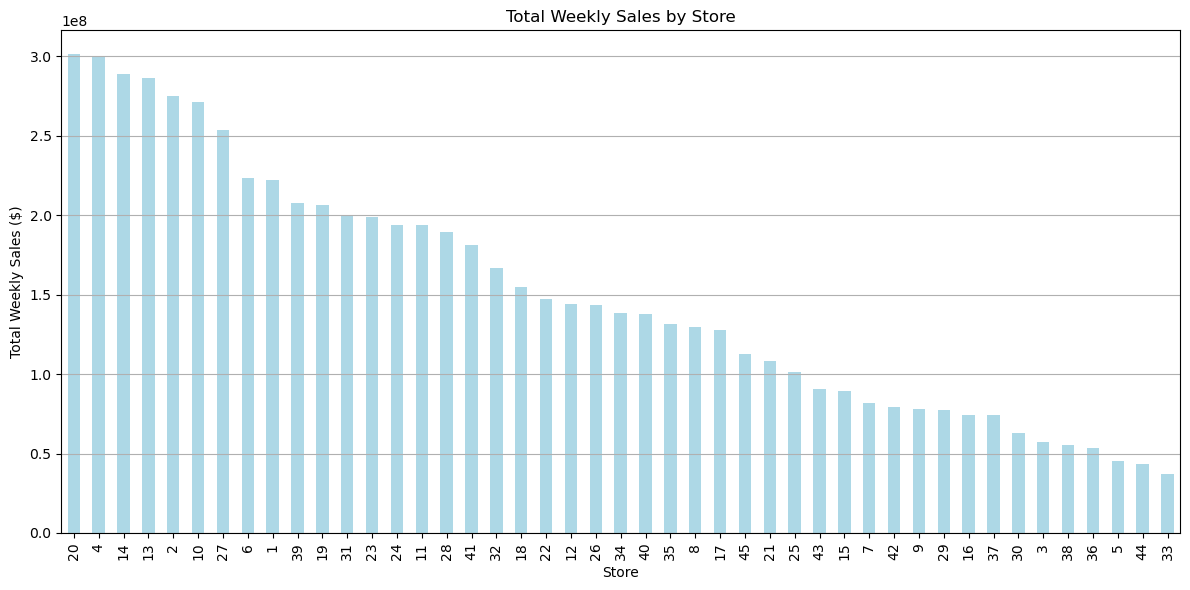

In [23]:
# Aggregating total sales by store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plotting a bar chart to compare total sales across different stores
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='lightblue')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Insights:

* The total sales chart shows which stores generate the most revenue over the period.
* The average sales chart helps highlight stores that consistently perform better or worse, independent of volume

# 2. Identify Ditribution

# 2.1. Test for Weekly_Sales Distribution Fit - GMM Gaussian Mixture Distribution

## Test for Normal Distribution

### Shapiro-Wilk Test

In [30]:
from scipy.stats import shapiro, kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns

# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p_value = shapiro(data['Weekly_Sales'].dropna())


print('Statistics', shapiro_stat)
print('p-value', shapiro_p_value)

Statistics 0.9470728301310753
p-value 3.822133481001272e-43


C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6435.
  res = hypotest_fun_out(*samples, **kwds)


#### Interpretation:

The Shapiro-Wilk test suggests that the Weekly_Sales data does not follow a normal distribution. The p-value is extremely small, indicating a rejection of the null hypothesis (which is that the data is normally distributed).

### Kolmogorov-Smirnov (K-S) Test

In [33]:
# Kolmogorov-Smirnov test comparing to a normal distribution
ks_stat, ks_p_value = kstest(data['Weekly_Sales'].dropna(), 'norm', args=(data['Weekly_Sales'].mean(), data['Weekly_Sales'].std()))

print('Statistics', ks_stat)
print('p-value', ks_p_value)

Statistics 0.08234118483605396
p-value 2.1126298348509479e-38


#### Interpretation:

The Kolmogorov-Smirnov test also indicates that the data does not follow a normal distribution, as the p-value is very small.

### Visual Inspection:

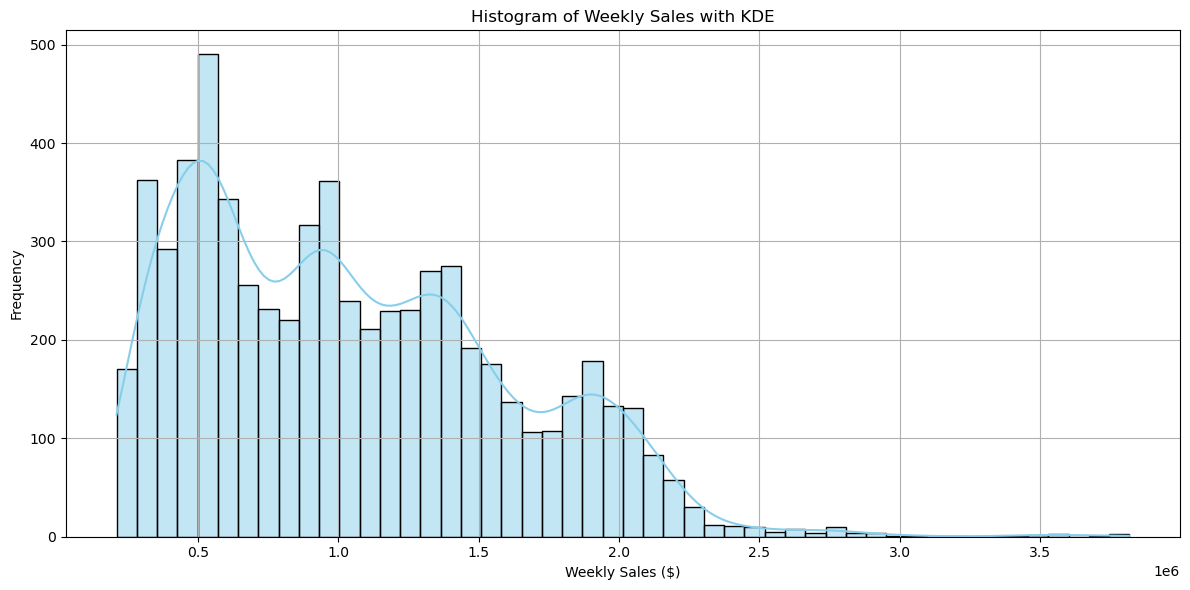

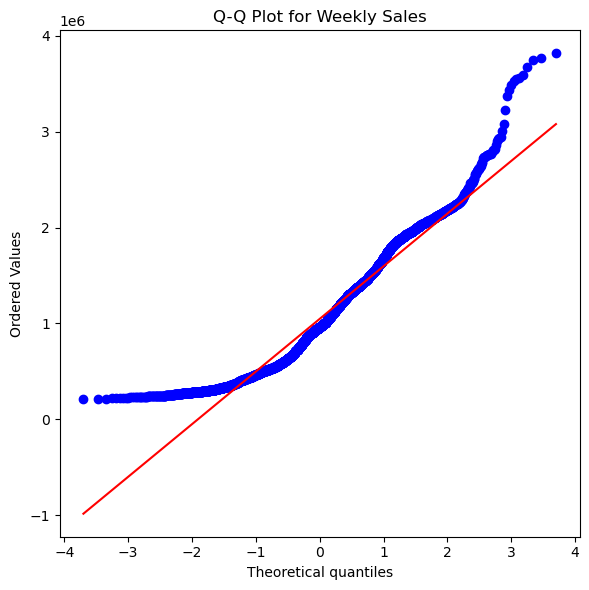

In [36]:
# Plotting histogram and Q-Q plot for visual inspection
plt.figure(figsize=(12, 6))
sns.histplot(data['Weekly_Sales'].dropna(), kde=True, color='skyblue', bins=50)
plt.title('Histogram of Weekly Sales with KDE')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q plot to visually inspect normality
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(data['Weekly_Sales'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Weekly Sales')
plt.tight_layout()
plt.show()

#### Conclusion:
The Weekly_Sales data does not follow a normal distribution based on both the statistical tests and visual inspection.

## Log-Normal Distribution

### Hypothesis test

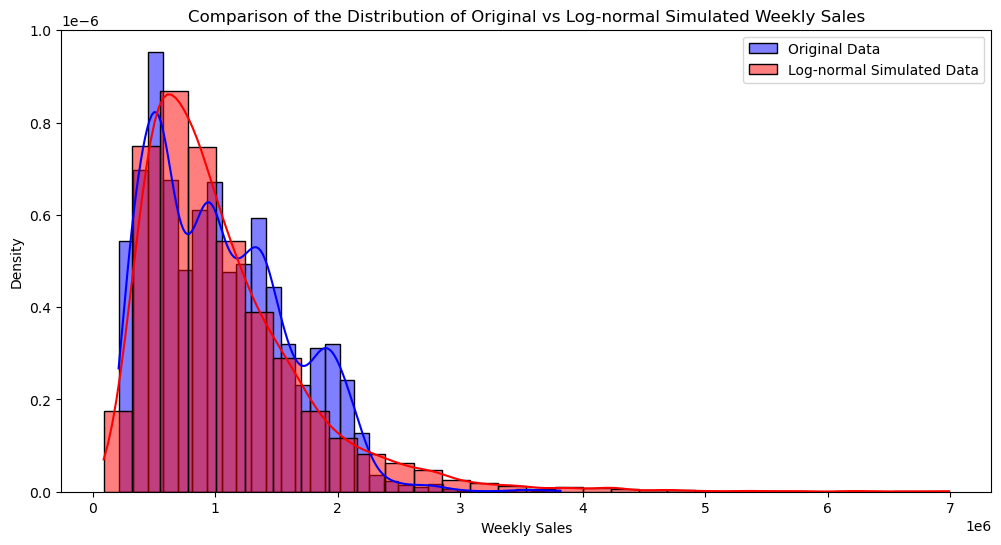

KS Statistics 0.06418026418026418
p-value 6.059066188040525e-12


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm, ks_2samp

# Assuming 'data['Weekly_Sales']' contains your actual dataset

# Reshape the data to a 1D array
sales_data = data['Weekly_Sales'].dropna().values

# Fit a log-normal distribution to the data
params_ln = lognorm.fit(sales_data, floc=0)

# Generate simulated data from the fitted log-normal distribution
simulated_ln_sales = lognorm.rvs(*params_ln, size=len(sales_data))

# Perform the Kolmogorov-Smirnov test between the original data and the log-normal simulated data
ks_stat_ln, ks_p_value_ln = ks_2samp(sales_data, simulated_ln_sales)

# Visualize the original and log-normal simulated sales distributions
plt.figure(figsize=(12, 6))

# Plot the original data
sns.histplot(sales_data, kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the log-normal simulated data
sns.histplot(simulated_ln_sales, kde=True, color='red', stat='density', label='Log-normal Simulated Data', bins=30)

# Add labels and legend
plt.title("Comparison of the Distribution of Original vs Log-normal Simulated Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

# Output the KS statistic and p-value
print('KS Statistics', ks_stat_ln)
print('p-value', ks_p_value_ln)

The p-value is extremely small (much less than 0.05), which suggests that we reject the null hypothesis. This means the original and simulated datasets do not come from the same distribution.

## GMM Gaussian Mix Distribution

### Hypothesis test

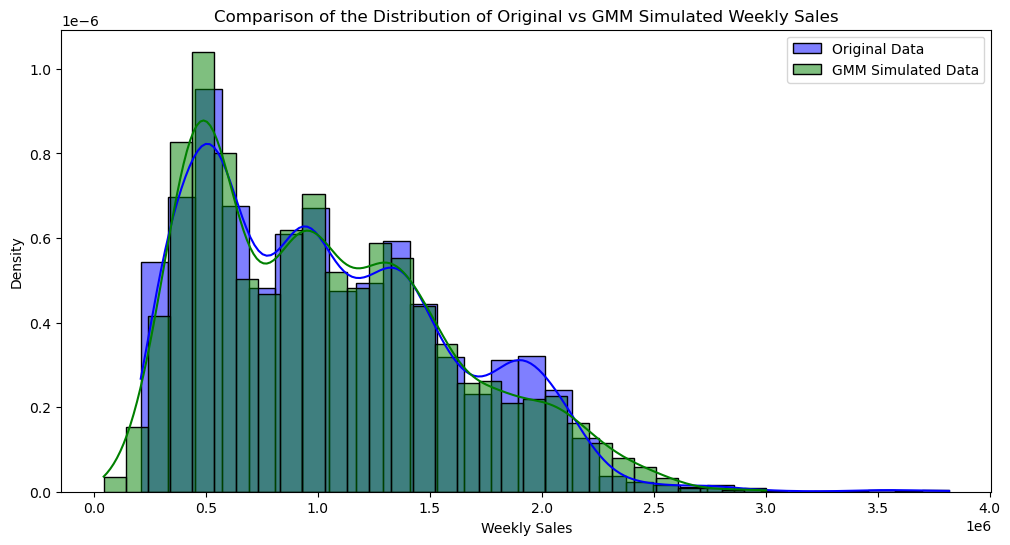

KS Statistics 0.015850815850815853
p-value 0.3939910545273314


In [44]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import ks_2samp

# Reshape the data to a 2D array (needed for GMM fitting)
sales_data = data['Weekly_Sales'].dropna().values.reshape(-1, 1)

# Fit a Gaussian Mixture Model (GMM) to the data
gmm = GaussianMixture(n_components=4, random_state=42)  # Using 2 components for multimodal fit
gmm.fit(sales_data)

# Generate simulated data from the fitted GMM
simulated_gmm_sales = gmm.sample(len(sales_data))[0]

# Perform the Kolmogorov-Smirnov test between the original data and the GMM simulated data
ks_stat_gmm, ks_p_value_gmm = ks_2samp(sales_data.flatten(), simulated_gmm_sales.flatten())

# Visualize the original and GMM simulated sales distributions
plt.figure(figsize=(12, 6))

# Plot the original data
sns.histplot(sales_data.flatten(), kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the GMM simulated data
sns.histplot(simulated_gmm_sales.flatten(), kde=True, color='green', stat='density', label='GMM Simulated Data', bins=30)

# Add labels and legend
plt.title("Comparison of the Distribution of Original vs GMM Simulated Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

print('KS Statistics', ks_stat_gmm)
print('p-value', ks_p_value_gmm)

The log-normal distribution fits the Weekly Sales data well, as indicated by the low KS statistic and the high p-value. The p-value of 0.394 suggests that there is no significant difference between the data and the simulated distribution, meaning that the log-normal model is a valid choice for modeling this sales data.

## Conclusion: GMM Gaussian Mixture Distribution with 4 Components is the best fit of Sales data


# 2.2. Test for Fuel_Price Distribution Fit - Gamma Mixture Distribution

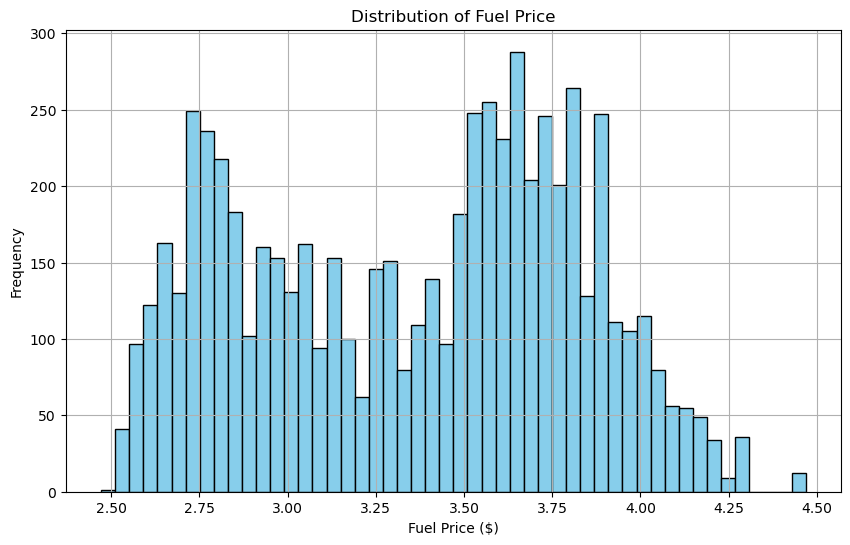

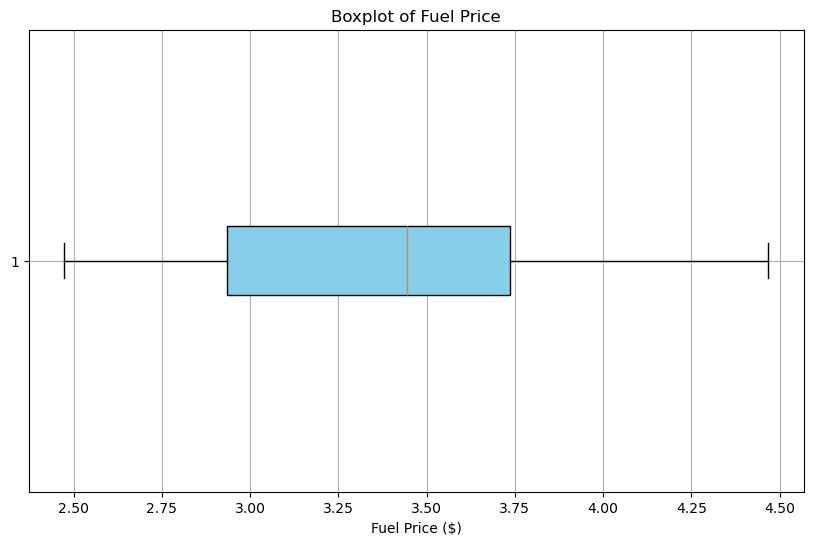

In [48]:
import matplotlib.pyplot as plt

# Plotting the distribution of Weekly_Sales using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Fuel_Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a boxplot for Weekly_Sales to identify potential outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Fuel_Price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot of Fuel Price')
plt.xlabel('Fuel Price ($)')
plt.grid(True)
plt.show()


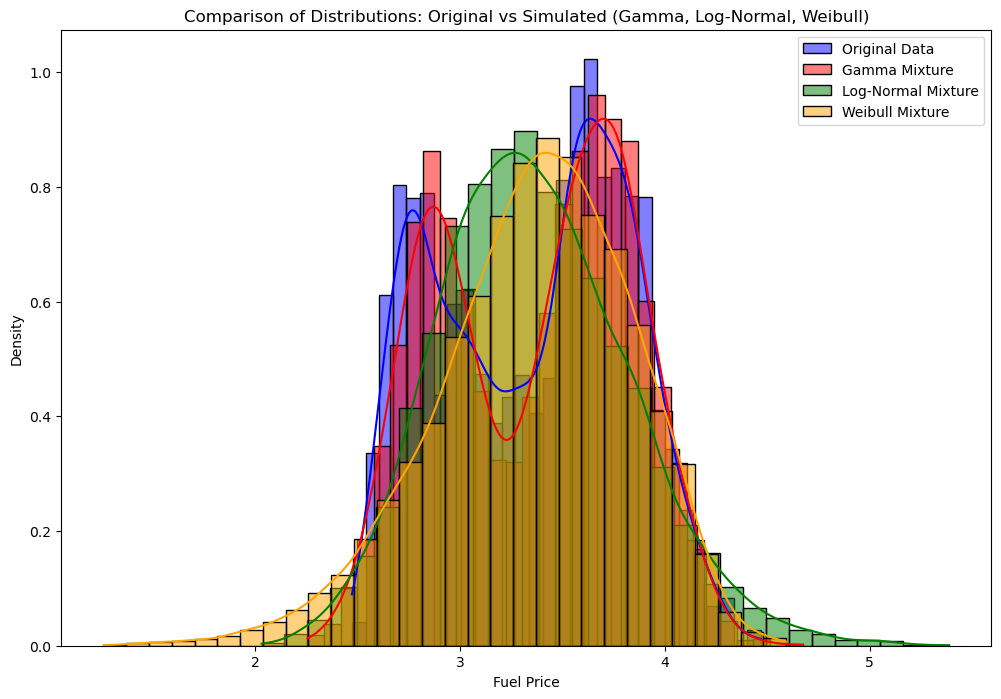

Gamma Mixture KS Statistics: 0.029836829836829837
Log-Normal Mixture KS Statistics: 0.11484071484071484
Weibull Mixture KS Statistics: 0.08593628593628594


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, lognorm, weibull_min, ks_2samp
from sklearn.mixture import GaussianMixture

# Assuming 'data['Fuel_Price']' contains the dataset
fuel_price_data = data['Fuel_Price'].dropna().values

# --- 1. Gamma Mixture Model ---
# Fit a Gaussian Mixture Model (GMM) to a mixture of 2 Gamma distributions
gmm_gamma = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_gamma.fit(fuel_price_data.reshape(-1, 1))

# Generate simulated Gamma mixture data
simulated_gmm_gamma = gmm_gamma.sample(len(fuel_price_data))[0]

# KS Test between original data and Gamma mixture simulated data
ks_stat_gamma, _ = ks_2samp(fuel_price_data, simulated_gmm_gamma.flatten())

# --- 2. Log-Normal Mixture ---
# Fit a Log-normal distribution to the data
params_ln = lognorm.fit(fuel_price_data, floc=0)

# Generate simulated data from the fitted Log-normal distribution
simulated_ln_data = lognorm.rvs(*params_ln, size=len(fuel_price_data))

# KS Test between original data and Log-normal simulated data
ks_stat_ln, _ = ks_2samp(fuel_price_data, simulated_ln_data)

# --- 3. Weibull Mixture Distribution ---
# Fit a Weibull distribution to the data (as mixture, two distributions)
params_weibull = weibull_min.fit(fuel_price_data, floc=0)

# Generate simulated Weibull data from the fitted parameters
simulated_weibull_data = weibull_min.rvs(*params_weibull, size=len(fuel_price_data))

# KS Test between original data and Weibull simulated data
ks_stat_weibull, _ = ks_2samp(fuel_price_data, simulated_weibull_data)

# --- Visualization and Results ---
plt.figure(figsize=(12, 8))

# Plot the original data
sns.histplot(fuel_price_data, kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the simulated data for each model
sns.histplot(simulated_gmm_gamma.flatten(), kde=True, color='red', stat='density', label='Gamma Mixture', bins=30)
sns.histplot(simulated_ln_data, kde=True, color='green', stat='density', label='Log-Normal Mixture', bins=30)
sns.histplot(simulated_weibull_data, kde=True, color='orange', stat='density', label='Weibull Mixture', bins=30)

# Add labels and legend
plt.title("Comparison of Distributions: Original vs Simulated (Gamma, Log-Normal, Weibull)")
plt.xlabel("Fuel Price")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

# Output KS Statistics for each model (without p-value)
print('Gamma Mixture KS Statistics:', ks_stat_gamma)
print('Log-Normal Mixture KS Statistics:', ks_stat_ln)
print('Weibull Mixture KS Statistics:', ks_stat_weibull)


# 2.3. Holiday - Binomial Distribution 

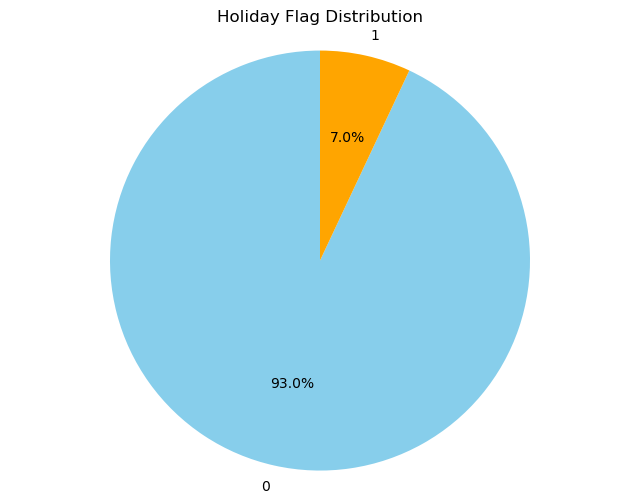

In [51]:
# Assuming 'data' contains a 'Holiday_Flag' column
holiday_flag_data = data['Holiday_Flag'].dropna()

# Plotting a pie chart for the Holiday_Flag distribution
plt.figure(figsize=(8, 6))
holiday_flag_counts = holiday_flag_data.value_counts()
plt.pie(holiday_flag_counts, labels=holiday_flag_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Holiday Flag Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


In [52]:
print('p = ',round(data['Holiday_Flag'].mean(), 2))

p =  0.07


# 2.4. Unemployment - Weibull Distribution

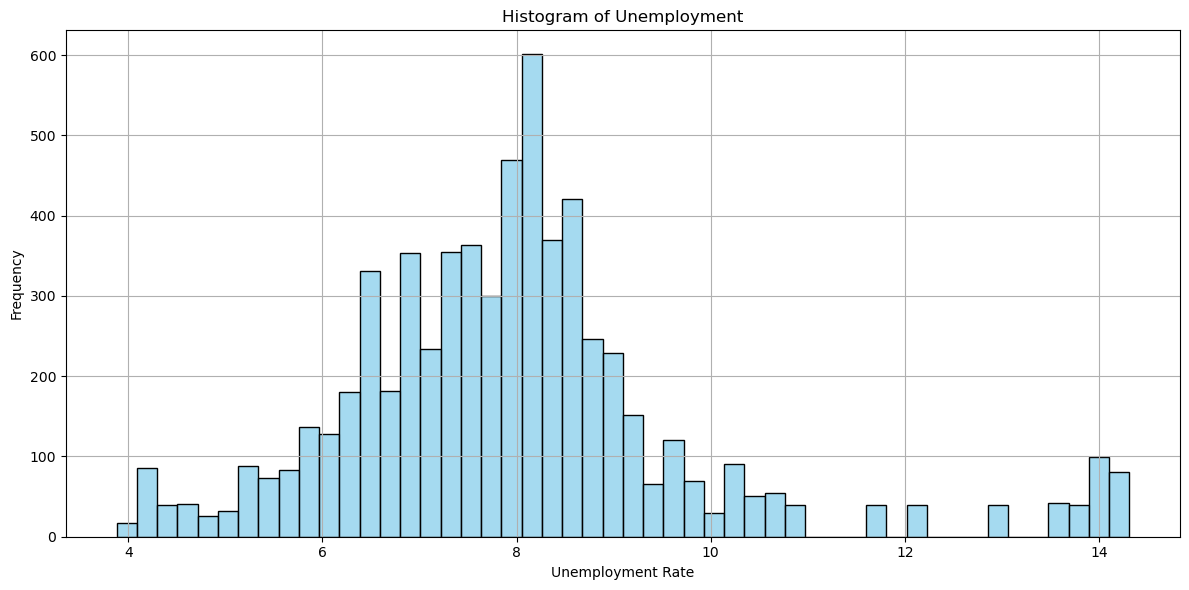

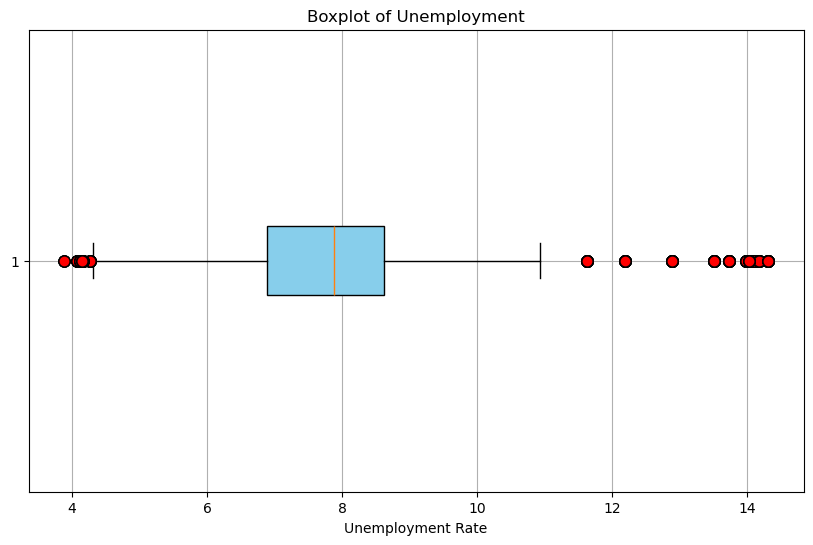

In [54]:
# Plotting histogram and Q-Q plot for visual inspection
plt.figure(figsize=(12, 6))
sns.histplot(data['Unemployment'].dropna(), color='skyblue', bins=50)
plt.title('Histogram of Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting a boxplot for Weekly_Sales to identify potential outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Unemployment'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot of Unemployment')
plt.xlabel('Unemployment Rate')
plt.grid(True)
plt.show()

In [55]:
import numpy as np
import pandas as pd

# Assuming 'data['Unemployment']' contains the dataset
unemployment_data1 = data['Unemployment'].dropna()

# Calculate the first (Q1) and third quartiles (Q3)
Q1 = unemployment_data1.quantile(0.25)
Q3 = unemployment_data1.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
unemployment_data = unemployment_data1[(unemployment_data1 >= lower_bound) & (unemployment_data1 <= upper_bound)]

# Display the data without outliers
print(f"Original data size: {len(unemployment_data1)}")
print(f"Data size after removing outliers: {len(unemployment_data)}")


Original data size: 6435
Data size after removing outliers: 5954


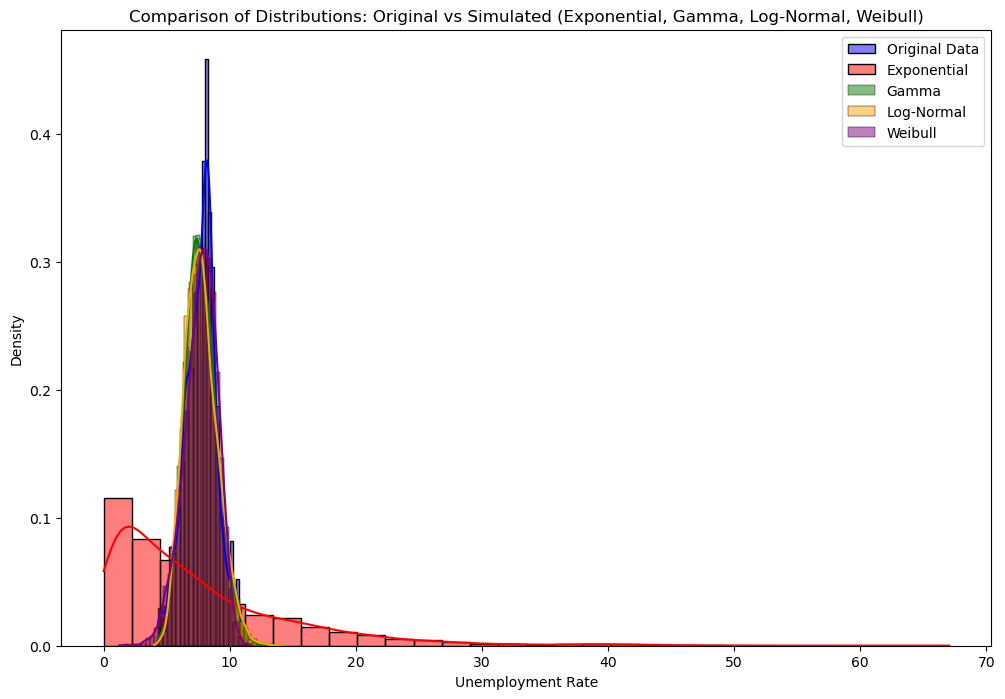

Exponential KS Statistics: 0.4758145784346658
Gamma KS Statistics: 0.07070876721531744
Log-Normal KS Statistics: 0.08045011756802149
Weibull KS Statistics: 0.05626469600268727


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, gamma, lognorm, weibull_min, ks_2samp
from sklearn.mixture import GaussianMixture

# Assuming 'data['Unemployment']' contains the dataset
#unemployment_data = unemployment_data.dropna().values

# --- 1. Exponential Distribution ---
# Fit an Exponential distribution to the data
params_exp = expon.fit(unemployment_data, floc=0)

# Generate simulated Exponential data from the fitted parameters
simulated_exp_data = expon.rvs(*params_exp, size=len(unemployment_data))

# KS Test between original data and Exponential simulated data
ks_stat_exp, _ = ks_2samp(unemployment_data, simulated_exp_data)

# --- 2. Gamma Distribution ---
# Fit a Gamma distribution to the data
params_gamma = gamma.fit(unemployment_data, floc=0)

# Generate simulated Gamma data from the fitted parameters
simulated_gamma_data = gamma.rvs(*params_gamma, size=len(unemployment_data))

# KS Test between original data and Gamma simulated data
ks_stat_gamma, _ = ks_2samp(unemployment_data, simulated_gamma_data)

# --- 3. Log-Normal Distribution ---
# Fit a Log-normal distribution to the data
params_ln = lognorm.fit(unemployment_data, floc=0)

# Generate simulated Log-normal data from the fitted parameters
simulated_ln_data = lognorm.rvs(*params_ln, size=len(unemployment_data))

# KS Test between original data and Log-normal simulated data
ks_stat_ln, _ = ks_2samp(unemployment_data, simulated_ln_data)

# --- 4. Weibull Distribution ---
# Fit a Weibull distribution to the data
params_weibull = weibull_min.fit(unemployment_data, floc=0)

# Generate simulated Weibull data from the fitted parameters
simulated_weibull_data = weibull_min.rvs(*params_weibull, size=len(unemployment_data))

# KS Test between original data and Weibull simulated data
ks_stat_weibull, _ = ks_2samp(unemployment_data, simulated_weibull_data)

# --- Visualization and Results ---
plt.figure(figsize=(12, 8))

# Plot the original data
sns.histplot(unemployment_data, kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the simulated data for each model
sns.histplot(simulated_exp_data, kde=True, color='red', stat='density', label='Exponential', bins=30)
sns.histplot(simulated_gamma_data, kde=True, color='green', stat='density', label='Gamma', bins=30)
sns.histplot(simulated_ln_data, kde=True, color='orange', stat='density', label='Log-Normal', bins=30)
sns.histplot(simulated_weibull_data, kde=True, color='purple', stat='density', label='Weibull', bins=30)

# Add labels and legend
plt.title("Comparison of Distributions: Original vs Simulated (Exponential, Gamma, Log-Normal, Weibull)")
plt.xlabel("Unemployment Rate")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

# Output KS Statistics for each model (without p-value)
print('Exponential KS Statistics:', ks_stat_exp)
print('Gamma KS Statistics:', ks_stat_gamma)
print('Log-Normal KS Statistics:', ks_stat_ln)
print('Weibull KS Statistics:', ks_stat_weibull)


# 2.5. Temperature - Weibull Distribution

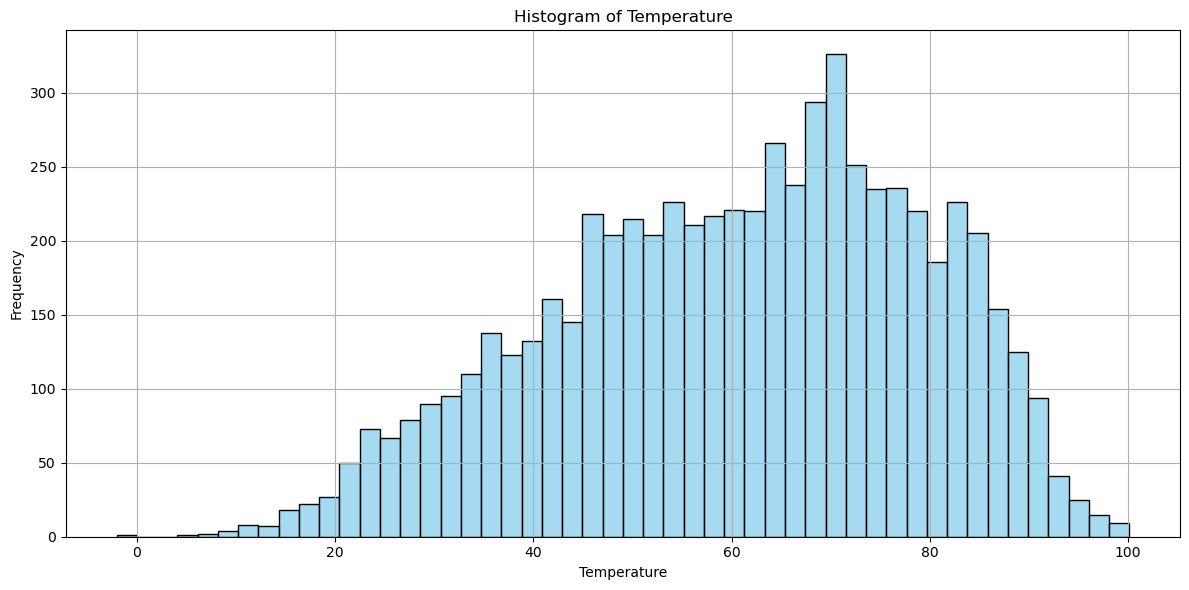

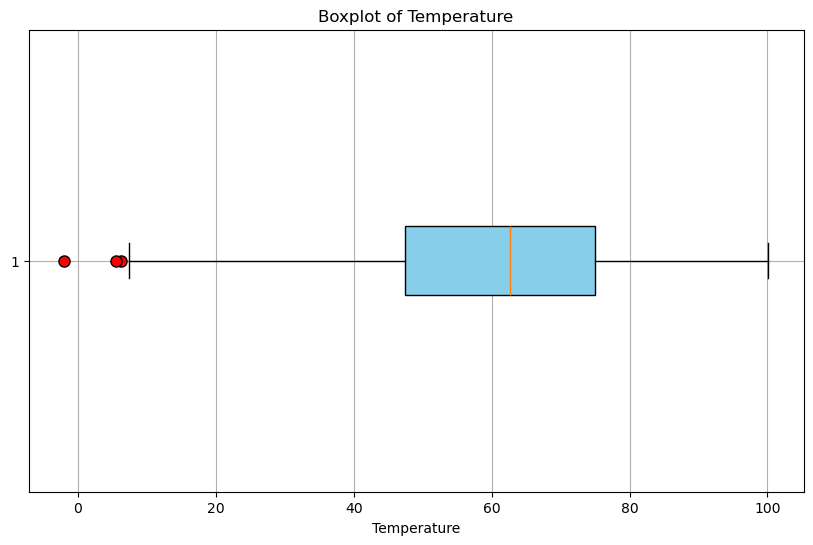

In [58]:
# Plotting histogram and Q-Q plot for visual inspection
plt.figure(figsize=(12, 6))
sns.histplot(data['Temperature'].dropna(), color='skyblue', bins=50)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting a boxplot for Weekly_Sales to identify potential outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Temperature'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
plt.grid(True)
plt.show()

In [59]:
# Check for any invalid values (negative or zero) in the temperature data
temperature_data = data['Temperature']

invalid_values = temperature_data[temperature_data <= 0]

# Clean the temperature data by removing invalid values
cleaned_temperature_data = temperature_data[temperature_data > 0]

# Display the number of invalid values and the cleaned data's first few rows
len(invalid_values), cleaned_temperature_data[:10]


(1,
 0    42.31
 1    38.51
 2    39.93
 3    46.63
 4    46.50
 5    57.79
 6    54.58
 7    51.45
 8    62.27
 9    65.86
 Name: Temperature, dtype: float64)

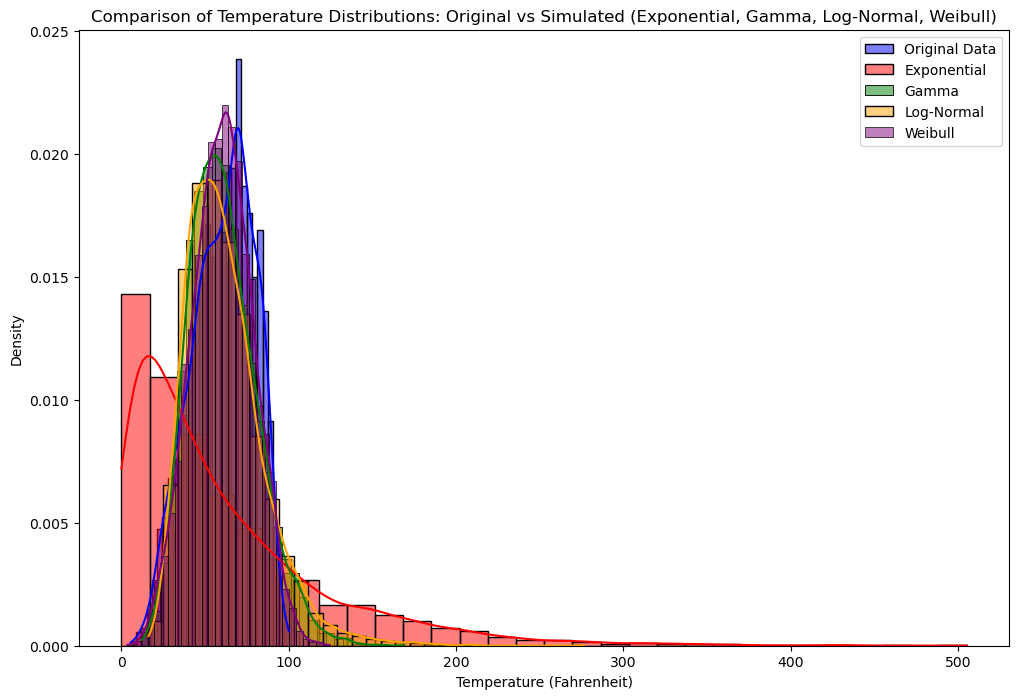

{'Exponential KS Statistic': 0.3399129623873174,
 'Gamma KS Statistic': 0.07973267018961766,
 'Log-Normal KS Statistic': 0.08983525023313646,
 'Weibull KS Statistic': 0.06201429903636929}

In [60]:
# Re-import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Exponential Distribution ---
params_exp_temp = expon.fit(cleaned_temperature_data, floc=0)
simulated_exp_temp = expon.rvs(*params_exp_temp, size=len(cleaned_temperature_data))
ks_stat_exp_temp, _ = ks_2samp(cleaned_temperature_data, simulated_exp_temp)

# --- 2. Gamma Distribution ---
params_gamma_temp = gamma.fit(cleaned_temperature_data, floc=0)
simulated_gamma_temp = gamma.rvs(*params_gamma_temp, size=len(cleaned_temperature_data))
ks_stat_gamma_temp, _ = ks_2samp(cleaned_temperature_data, simulated_gamma_temp)

# --- 3. Log-Normal Distribution ---
params_ln_temp = lognorm.fit(cleaned_temperature_data, floc=0)
simulated_ln_temp = lognorm.rvs(*params_ln_temp, size=len(cleaned_temperature_data))
ks_stat_ln_temp, _ = ks_2samp(cleaned_temperature_data, simulated_ln_temp)

# --- 4. Weibull Distribution ---
params_weibull_temp = weibull_min.fit(cleaned_temperature_data, floc=0)
simulated_weibull_temp = weibull_min.rvs(*params_weibull_temp, size=len(cleaned_temperature_data))
ks_stat_weibull_temp, _ = ks_2samp(cleaned_temperature_data, simulated_weibull_temp)

# --- Visualization ---
plt.figure(figsize=(12, 8))

# Plot the original temperature data
sns.histplot(cleaned_temperature_data, kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the simulated data for each distribution
sns.histplot(simulated_exp_temp, kde=True, color='red', stat='density', label='Exponential', bins=30)
sns.histplot(simulated_gamma_temp, kde=True, color='green', stat='density', label='Gamma', bins=30)
sns.histplot(simulated_ln_temp, kde=True, color='orange', stat='density', label='Log-Normal', bins=30)
sns.histplot(simulated_weibull_temp, kde=True, color='purple', stat='density', label='Weibull', bins=30)

# Add labels and legend
plt.title("Comparison of Temperature Distributions: Original vs Simulated (Exponential, Gamma, Log-Normal, Weibull)")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

# Output KS Statistics for each model (without p-value)
ks_stats = {
    'Exponential KS Statistic': ks_stat_exp_temp,
    'Gamma KS Statistic': ks_stat_gamma_temp,
    'Log-Normal KS Statistic': ks_stat_ln_temp,
    'Weibull KS Statistic': ks_stat_weibull_temp
}

ks_stats


# 2.6. CPI - Gamma Mixture Distribution

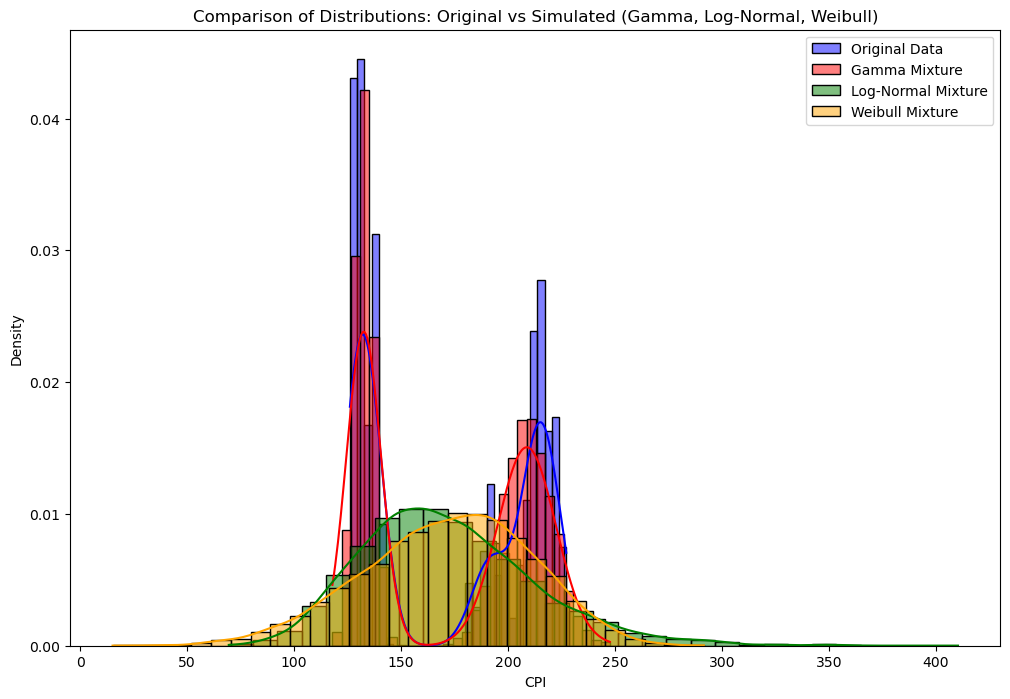

Gamma Mixture KS Statistics: 0.09448329448329448
Log-Normal Mixture KS Statistics: 0.24475524475524477
Weibull Mixture KS Statistics: 0.2630924630924631


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, lognorm, weibull_min, ks_2samp
from sklearn.mixture import GaussianMixture

cpi_data = data['CPI'].dropna().values

# --- 1. Gamma Mixture Model ---
# Fit a Gaussian Mixture Model (GMM) to a mixture of 2 Gamma distributions
gmm_gamma = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_gamma.fit(cpi_data.reshape(-1, 1))

# Generate simulated Gamma mixture data
simulated_gmm_gamma = gmm_gamma.sample(len(cpi_data))[0]

# KS Test between original data and Gamma mixture simulated data
ks_stat_gamma, _ = ks_2samp(cpi_data, simulated_gmm_gamma.flatten())

# --- 2. Log-Normal Mixture ---
# Fit a Log-normal distribution to the data
params_ln = lognorm.fit(cpi_data, floc=0)

# Generate simulated data from the fitted Log-normal distribution
simulated_ln_data = lognorm.rvs(*params_ln, size=len(cpi_data))

# KS Test between original data and Log-normal simulated data
ks_stat_ln, _ = ks_2samp(cpi_data, simulated_ln_data)

# --- 3. Weibull Mixture Distribution ---
# Fit a Weibull distribution to the data (as mixture, two distributions)
params_weibull = weibull_min.fit(cpi_data, floc=0)

# Generate simulated Weibull data from the fitted parameters
simulated_weibull_data = weibull_min.rvs(*params_weibull, size=len(cpi_data))

# KS Test between original data and Weibull simulated data
ks_stat_weibull, _ = ks_2samp(cpi_data, simulated_weibull_data)

# --- Visualization and Results ---
plt.figure(figsize=(12, 8))

# Plot the original data
sns.histplot(cpi_data, kde=True, color='blue', stat='density', label='Original Data', bins=30)

# Plot the simulated data for each model
sns.histplot(simulated_gmm_gamma.flatten(), kde=True, color='red', stat='density', label='Gamma Mixture', bins=30)
sns.histplot(simulated_ln_data, kde=True, color='green', stat='density', label='Log-Normal Mixture', bins=30)
sns.histplot(simulated_weibull_data, kde=True, color='orange', stat='density', label='Weibull Mixture', bins=30)

# Add labels and legend
plt.title("Comparison of Distributions: Original vs Simulated (Gamma, Log-Normal, Weibull)")
plt.xlabel("CPI")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

# Output KS Statistics for each model (without p-value)
print('Gamma Mixture KS Statistics:', ks_stat_gamma)
print('Log-Normal Mixture KS Statistics:', ks_stat_ln)
print('Weibull Mixture KS Statistics:', ks_stat_weibull)


# 3. Fit models

In [64]:
# Clean the dataset by dropping any rows with missing values
cleaned_data = data.dropna()

# Selecting features and target variable
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

# Features and target variable for model fitting
X = cleaned_data[features]
y = cleaned_data[target]

# Check the cleaned data for correctness
X.head(), y.head()


(   Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
 0             0        42.31       2.572  211.096358         8.106
 1             1        38.51       2.548  211.242170         8.106
 2             0        39.93       2.514  211.289143         8.106
 3             0        46.63       2.561  211.319643         8.106
 4             0        46.50       2.625  211.350143         8.106,
 0    1643690.90
 1    1641957.44
 2    1611968.17
 3    1409727.59
 4    1554806.68
 Name: Weekly_Sales, dtype: float64)

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        # Perform cross-validation on training data
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        # Fit the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'CV Mean Score (MSE)': -cv_score.mean(),
            'MAE': mae,
            'MSE': mse,
            'R^2': r2
        }
    
    return results

# Evaluate the models
model_results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display the results
model_results


{'Linear Regression': {'CV Mean Score (MSE)': 309538667617.034,
  'MAE': 475432.53295882524,
  'MSE': 316554511405.115,
  'R^2': 0.01738312550370069},
 'Random Forest': {'CV Mean Score (MSE)': 273085357432.7124,
  'MAE': 383451.55622938526,
  'MSE': 287424521834.40936,
  'R^2': 0.10780552756969142},
 'Gradient Boosting': {'CV Mean Score (MSE)': 248942796343.81104,
  'MAE': 413218.34938056447,
  'MSE': 246807811874.70312,
  'R^2': 0.2338838589628367}}

#### Gradient Boosting Regressor performs the best with the highest R^2 of 0.234, meaning it explains 23.4% of the variance in the data.

# 4. Simulation

## 4.1. Simulate Attributes data

In [135]:
from scipy.stats import gamma, weibull_min, binom

# Ensure all simulated data arrays have exactly the same length (50)
num_samples = 50

# Simulate CPI using Gamma Mixture Distribution (correcting length)
params_cpi_1 = gamma.fit(cleaned_data['CPI'], floc=0)
params_cpi_2 = gamma.fit(cleaned_data['CPI'], floc=0)
cpi_mix_1 = gamma.rvs(*params_cpi_1, size=num_samples)
cpi_mix_2 = gamma.rvs(*params_cpi_2, size=num_samples)
simulated_cpi = np.concatenate([cpi_mix_1, cpi_mix_2])[:num_samples]  # Ensure length is 500

# Simulate Temperature using Weibull Distribution
params_temp = weibull_min.fit(cleaned_data['Temperature'], floc=0)
simulated_temp = weibull_min.rvs(*params_temp, size=num_samples)

# Simulate Unemployment using Weibull Distribution
params_unemp = weibull_min.fit(cleaned_data['Unemployment'], floc=0)
simulated_unemp = weibull_min.rvs(*params_unemp, size=num_samples)

# Simulate Holiday using Binomial Distribution
simulated_holiday = binom.rvs(1, p=0.2, size=num_samples)

# Simulate Fuel Price using Gamma Mixture Distribution (correcting length)
params_fuel_1 = gamma.fit(cleaned_data['Fuel_Price'], floc=0)
params_fuel_2 = gamma.fit(cleaned_data['Fuel_Price'], floc=0)
fuel_mix_1 = gamma.rvs(*params_fuel_1, size=num_samples)
fuel_mix_2 = gamma.rvs(*params_fuel_2, size=num_samples)
simulated_fuel_price = np.concatenate([fuel_mix_1, fuel_mix_2])[:num_samples]  # Ensure length is 500

# Construct the simulated dataset with consistent length
simulated_data = pd.DataFrame({
    'Holiday_Flag': simulated_holiday,
    'Temperature': simulated_temp,
    'Fuel_Price': simulated_fuel_price,
    'CPI': simulated_cpi,
    'Unemployment': simulated_unemp
})

# Display the first few rows to confirm
simulated_data.head()


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,46.363924,3.447506,154.796758,4.991908
1,1,37.331566,3.834408,137.508492,5.621514
2,0,45.942194,3.185711,164.137246,9.357999
3,0,32.674329,3.412670,214.796291,8.804436
4,0,24.158045,2.897690,128.943078,6.870392


## 4.2. Predict Weekly Sales

In [137]:
# Retraining the Gradient Boosting Regressor using the original dataset
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the simulated data using the retrained Gradient Boosting model
simulated_weekly_sales = gb_model.predict(simulated_data)

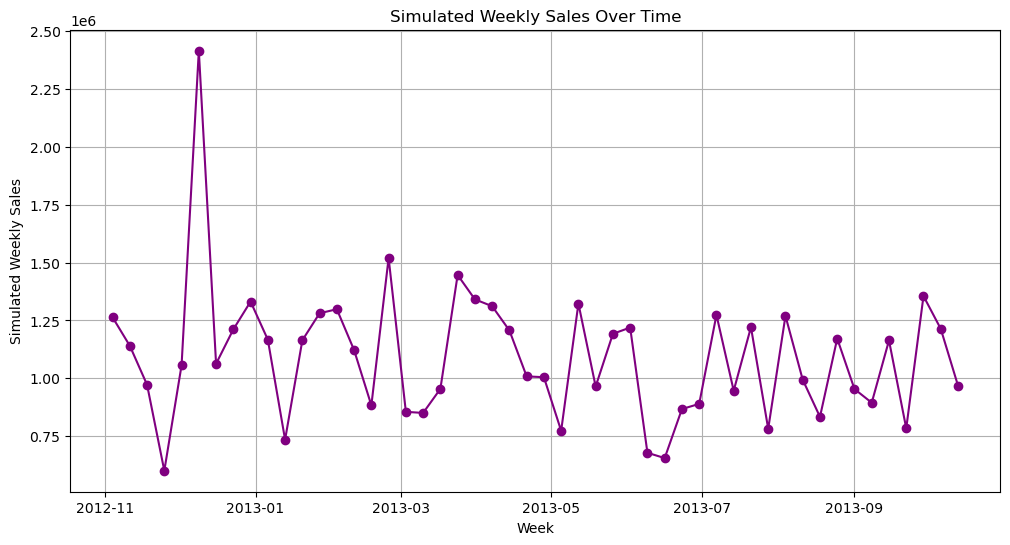

In [139]:
# Create a time index for the simulated dataset
simulated_data['Week'] = pd.date_range(start='2012-11-02', periods=len(simulated_weekly_sales), freq='W')

# Add the predicted Weekly Sales to the simulated dataset
simulated_data['Simulated_Weekly_Sales'] = simulated_weekly_sales

# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))
plt.plot(simulated_data['Week'], simulated_data['Simulated_Weekly_Sales'], marker='o', linestyle='-', color='purple')
plt.title("Simulated Weekly Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Simulated Weekly Sales")
plt.grid(True)
plt.show()
